# 1) SALES PREDICTION

## 1.1) Introduction
* Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

### 1.2) Problem Statement

* In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential.

### 1.3) Load the Libraries required

In [3]:
#Libraries Required
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

---

### 1.4) Load and Understand the dataset

In [4]:
sales_data = pd.read_csv(r"C:\Users\wanji\Desktop\Data\archive (6)\advertising.csv")
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


---

## 1.4.1) Dataset Info:
* Info
* Columns, rows
* Statistics

### i) Info

In [5]:
# Dataset info, shape
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### ii) Dataset Shape

In [6]:
# Function to know the shape 
def check_dataset_shape(dataset):
    if isinstance(dataset, np.ndarray):
        print("Dataset shape:", dataset.shape)
    elif isinstance(dataset, pd.DataFrame):
        print("Dataset shape:", dataset.shape)
    else:
        print("Invalid dataset type. Please provide a NumPy array or a Pandas DataFrame.")
        
check_dataset_shape(sales_data)

Dataset shape: (200, 4)


### iii) Dataset Describe/Statistics

In [7]:
# Function to know statistics
def dataset_statistics_describe(dataset):
    """
    Function to obtain information about a given dataset.
    
    Args:
    - dataset (pandas.DataFrame): The dataset to get information about.
    
    Returns:
    - None: Prints the information about the dataset.
    """
    dataset_describe = dataset.describe()
    print(dataset_describe)


# Call the function to get statistics about the dataset
dataset_statistics_describe(sales_data)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## DATA CLEANING

In [8]:
# Check the percentage of the missing values
def print_missing_values(sales_data):

    # Get columns with missing values
    columns_with_missing = sales_data.columns[sales_data.isnull().any()].tolist()

    # Calculate sum and percentage of missing values for each column
    missing_values_sum = sales_data[columns_with_missing].isnull().sum()
    missing_values_percentage = (missing_values_sum / len(sales_data)) * 100

    # Create a table with the missing values information
    missing_values_table = pd.DataFrame({
        'Column': columns_with_missing,
        'Missing Values': missing_values_sum,
        'Percentage': missing_values_percentage
    })

    # Print the table with column names and their respective missing values
    print(f"{'Column':<20} {'Missing Values':<15} {'Percentage':<15}")
    for _, row in missing_values_table.iterrows():
        print(f"{row['Column']:<20} {row['Missing Values']:<15} {row['Percentage']:<15.2f}")

print_missing_values(sales_data)

Column               Missing Values  Percentage     


* From the above , there are no missing values

In [9]:
# Function to check for missing values and duplicates
def dataset_duplicated(dataset):
  
    dataset_duplicated = dataset.duplicated().sum()
    print(dataset_duplicated)


dataset_duplicated(sales_data)

0


### There are no duplicated values 

---

## 2) EDA / VISUALIZATION

In [10]:
import pandas as pd
import zipfile

# Specify the path to the ZIP archive
zip_file_path = r"C:\Users\wanji\Desktop\Data\archive (6).zip"

# Specify the name of the CSV file inside the ZIP archive
csv_file_name = "advertising.csv"

# Open the ZIP archive and read the CSV file
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_name) as csv_file_in_zip:
        # Read the CSV file into a DataFrame
        sales_data = pd.read_csv(csv_file_in_zip)
sales_data

# Now, 'df' contains the data from the CSV file


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Text(0.5, 1.0, 'TV Histogram')

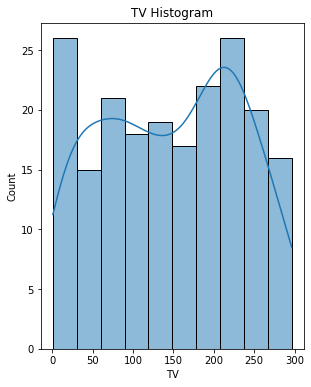

In [11]:
# Histograms
plt.figure(figsize=(16, 6))
plt.subplot(131)
sns.histplot(sales_data["TV"], bins=10, kde=True)
plt.title("TV Histogram")

* The plot above shows the 'TV Sales' made/distributiin of the TV Sales represented by a histogram 

Text(0.5, 1.0, 'Radio Histogram')

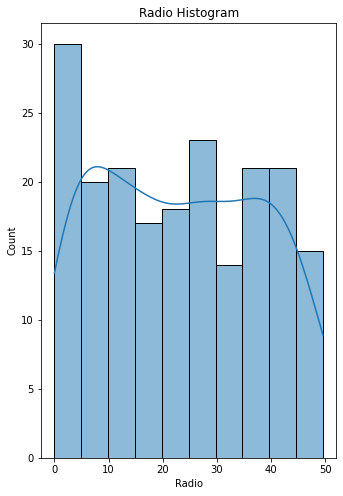

In [12]:
plt.figure(figsize=(18, 8))
plt.subplot(131)
sns.histplot(sales_data["Radio"], bins=10, kde=True)
plt.title("Radio Histogram")

* The plot above shows the 'Radio Sales' made/distributiin of the radio Sales represented by 

Text(0.5, 1.0, 'NewspapaerHistogram')

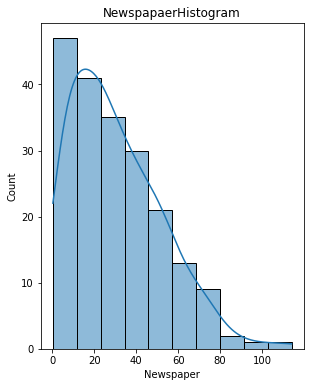

In [13]:
# Histograms
plt.figure(figsize=(16, 6))
plt.subplot(131)
sns.histplot(sales_data["Newspaper"], bins=10, kde=True)
plt.title("NewspapaerHistogram")

* The plot above shows the 'Newspaper Sales' made/distribution of the Newspapaer Sales represented by 

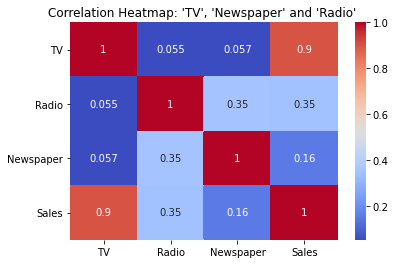

In [14]:
# Correlation matrix using a heatmap
correlation_matrix = sales_data.corr()
sns.heatmap(correlation_matrix, annot= True, cmap="coolwarm")
plt.title("Correlation Heatmap: 'TV', 'Newspaper' and 'Radio' ")
plt.show()

* The correlation matrix above shows correlation between the following variables'TV', 'Newspaper' and 'Radio' variables. The positive correlation in this case (1 or close to 1 ) indicate that people tend to watch more of the 'Televsion/Tv' and 'Newspaper' is more preferrable to the negative correlation that shows up in the correlation matrix that 'Radio' is the least preferred

# 3) Feature Engineering

* Scaling in n this case will be done to improve the models' performance

In [15]:
## Standard Scaling
scaler = StandardScaler()
sales_data[['TV','Radio','Newspaper']] = scaler.fit_transform(sales_data[['TV','Newspaper','Radio']])

* Creating a new feature with the above 'Total Budget' variable instead of having a separate variable and combine all of them together making it together

In [16]:
sales_data['Total Budget'] =sales_data['TV'] + sales_data['Newspaper'] + sales_data['Radio']

## Split the dataset

In [17]:
X = sales_data[['TV','Radio','Newspaper',]]
y= (sales_data['Sales'] > 15).astype(int)
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

---

# 4)  Modelling

## i) Baseline Model:  Linear Regression

In [18]:
# Create a pipeline with the preprocessed and modelling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [19]:

#Fit the pipeline to the training data 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [20]:
# Make the Prediction
y_pred = pipeline.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}")


Mean Squared Error:0.03948946937504336


---

## ii) Random Forest Model

In [22]:
# Create a pipeline with the preprocessed and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

# Fit the entire pipeline, including fitting the scaler
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)


In [23]:
# Evalate teh Classification model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)



print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1:{f1}")
print(f"Confusion Matrix:{conf}")

Accuracy:1.0
Precision:1.0
Recall:1.0
F1:1.0
Confusion Matrix:[[21  0]
 [ 0 19]]


In [24]:
# Calculate the ROC Curve 
y_prob = pipeline.predict_proba(X_test)[:,1]
fpr, tpr ,threshold = roc_curve(y_test, y_prob)

In [25]:
# Calculate AUC area
roc_auc = roc_auc_score(y_test,y_prob)

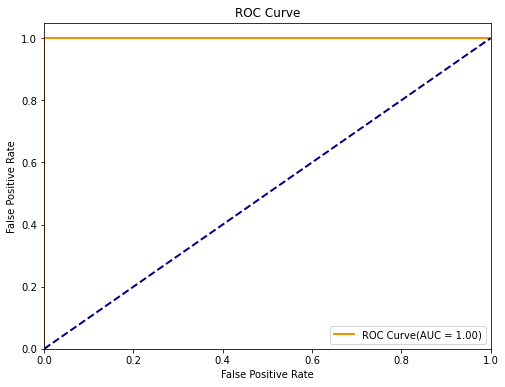

In [26]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2,label = f"ROC Curve(AUC = {roc_auc:.2f})") 
plt.plot([0,1],[0,1], color = 'navy', lw = 2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc= 'lower right')
plt.show()


---

## iii) Decision tree model 

In [27]:
# Create a pipeline with the preprocessed and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Fit the entire pipeline, including fitting the scaler
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

In [28]:
# Evaluate the Classification model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)



print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1:{f1}")
print(f"Confusion Matrix:{conf}")

Accuracy:1.0
Precision:1.0
Recall:1.0
F1:1.0
Confusion Matrix:[[21  0]
 [ 0 19]]


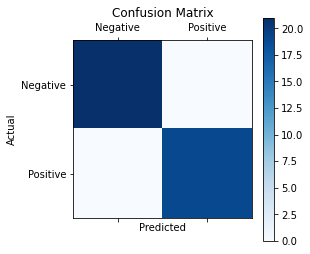

In [29]:
# 'y_test' and 'y_pred' are true labels and predicted labels
cm = confusion_matrix(y_test, y_pred)

plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()



In [30]:
# Calculate the roc 
fpr, tpr ,threshold = roc_curve(y_test, y_pred)

In [31]:
# Calculate AUC area
roc_auc = roc_auc_score(y_test,y_pred)

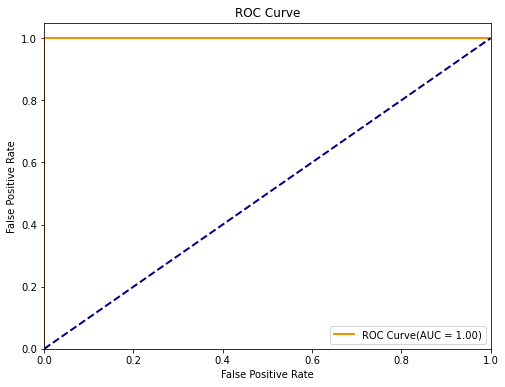

In [32]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2,label = f"ROC Curve(AUC = {roc_auc:.2f})") 
plt.plot([0,1],[0,1], color = 'navy', lw = 2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc= 'lower right')
plt.show()

---

### iv) SVC Model

In [33]:
model = {
    'Support Vector Machine':SVC()
    }
for name, model in model.items():
    pipeline = Pipeline([
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}\n{report}\n")
    

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40




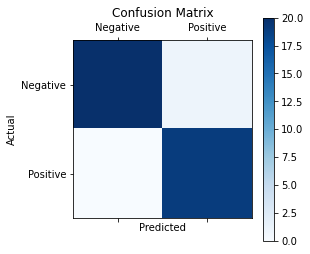

In [34]:
# 'y_test' and 'y_pred' are true labels and predicted labels
cm = confusion_matrix(y_test, y_pred)

plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [35]:
fpr, tpr ,threshold = roc_curve(y_test, y_pred)

# Calculate AUC area
roc_auc = roc_auc_score(y_test,y_pred)



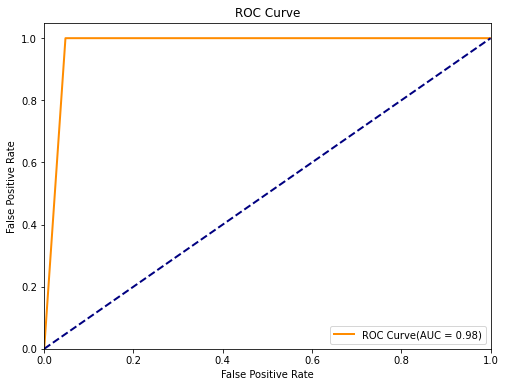

In [36]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2,label = f"ROC Curve(AUC = {roc_auc:.2f})") 
plt.plot([0,1],[0,1], color = 'navy', lw = 2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc= 'lower right')
plt.show()